In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Mexico  = pd.read_csv('Mexico.csv')

In [3]:
# Verificamos información del dataframe
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26582 non-null  int64  
 1   last_scraped                                  26582 non-null  object 
 2   name                                          26582 non-null  object 
 3   host_id                                       26582 non-null  int64  
 4   host_name                                     26582 non-null  object 
 5   host_since                                    26582 non-null  object 
 6   host_response_time                            26582 non-null  object 
 7   host_is_superhost                             26582 non-null  object 
 8   host_identity_verified                        26582 non-null  object 
 9   neighbourhood                                 26582 non-null 

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [4]:
#Calculamos el numero total de la población "n"

Mexico['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26582 entries, 0 to 26581
Series name: price
Non-Null Count  Dtype  
--------------  -----  
26582 non-null  float64
dtypes: float64(1)
memory usage: 207.8 KB


In [5]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Mexico['price'].max()
Min = Mexico['price'].min()
Limites = [Min, Max]
Limites

[0.0, 15726.0]

In [6]:
# Calculamos el rango R
R = Max - Min
R

15726.0

In [7]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 26582

ni = 1 + 3.32 * np.log10(n)
ni

15.689631010177528

In [8]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

1002.318027096933

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [9]:
# Categorización de variables
intervalos = np.linspace (0, 15726, 16)
intervalos

array([    0. ,  1048.4,  2096.8,  3145.2,  4193.6,  5242. ,  6290.4,
        7338.8,  8387.2,  9435.6, 10484. , 11532.4, 12580.8, 13629.2,
       14677.6, 15726. ])

In [10]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14", "Categoria15" ]

In [11]:
# Creamos las ctegorias en la columna numerica
Mexico['price'] = pd.cut ( x = Mexico ['price'], bins = intervalos, labels = categorias )
Mexico['price']

0        Categoria4
1        Categoria2
2        Categoria2
3        Categoria2
4        Categoria4
            ...    
26577    Categoria1
26578    Categoria3
26579    Categoria3
26580    Categoria3
26581    Categoria2
Name: price, Length: 26582, dtype: category
Categories (15, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria12' < 'Categoria13' < 'Categoria14' < 'Categoria15']

In [13]:
table1 = freq_tbl(Mexico['price'])
table1

,price,frequency,percentage,cumulative_perc
0,Categoria1,12650,0.475886,0.475904
1,Categoria2,10575,0.397826,0.873744
2,Categoria3,1854,0.069746,0.943493
3,Categoria4,614,0.023098,0.966593
4,Categoria5,332,0.012490,0.979083
5,Categoria6,199,0.007486,0.986569
6,Categoria7,105,0.003950,0.990520
7,Categoria8,63,0.002370,0.992890
8,Categoria10,57,0.002144,0.995034
9,Categoria9,52,0.001956,0.996990


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,price,frequency
0,Categoria1,12650
1,Categoria2,10575
2,Categoria3,1854
3,Categoria4,614
4,Categoria5,332
5,Categoria6,199
6,Categoria7,105
7,Categoria8,63
8,Categoria10,57
9,Categoria9,52


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('price')
Filtro_index

,frequency
price,
Categoria1,12650
Categoria2,10575
Categoria3,1854
Categoria4,614
Categoria5,332
Categoria6,199
Categoria7,105
Categoria8,63
Categoria10,57


Text(0, 0.5, 'Frecuencia')

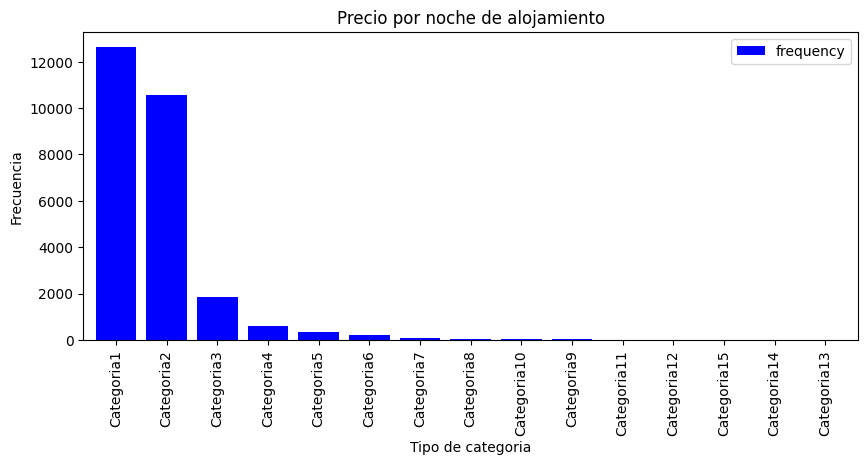

In [16]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Precio por noche de alojamiento')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')